# 1. Import Dependencies

In [122]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer, pipeline
from bs4 import BeautifulSoup
import requests
import csv


# 2. Setup Summarization Model

reference code: https://huggingface.co/human-centered-summarization/financial-summarization-pegasus

In [2]:
# name of the model we want to use for summarization. You can use any other model from the HuggingFace library
model_name = "human-centered-summarization/financial-summarization-pegasus"

# tokenizer is used to encode/decode the text into input format which the model expects
tokenizer = PegasusTokenizer.from_pretrained(model_name)

# load the model
model = PegasusForConditionalGeneration.from_pretrained(model_name)

c:\Users\Admin\anaconda3\envs\nick_stock_sentiment\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Admin\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


# 3. Summarize a single Article

In [15]:

url = "https://finance.yahoo.com/news/stock-market-news-today-live-updates-june-1-2023-115051823.html"
r = requests.get(url)
soup = BeautifulSoup(r.text, 'html.parser')
paragraphs = soup.find_all('p')

In [20]:
r

<Response [200]>

In [21]:
r.text

'<!doctype html><html id="atomic" class="NoJs Fz(62.5%) Pos(r) finance smartphone-lite bktfinance-US-en-US-def ua-android browser ua-2.3 failsafe" lang="en-US"><head><script>\n        window.performance.mark(\'PageStart\');\n        (function(html){var c = document.documentElement.classList;c.add(\'JsEnabled\', \'jsenabled\');c.remove(\'NoJs\');})(document.documentElement);\n        /**\n        * Empty darlaOnready method, to avoid JS error.\n        * This can happen when Async Darla JS file is loaded earlier than Darla Proxy JS.\n        * This method will be overridden by Darla Proxy\n        */\n        window.darlaOnready = function() {};\n        </script><title>Stocks pop as house passes debt deal</title><meta http-equiv="content-type" content="text/html; charset=utf-8"><meta http-equiv="x-dns-prefetch-control" content="on"><meta http-equiv="X-UA-Compatible" content="chrome=1"><meta name="oath:guce:consent-host" content="guce.yahoo.com"><meta name="viewport" content="width=devi

In [16]:
paragraphs

[<p>Stocks popped on Thursday after the<a class="link yahoo-link" data-i13n="cpos:1;pos:1" data-ylk="slk:House passed a bill t;cpos:1;pos:1;elm:context_link;itc:0;outcm:mb_qualified_link;_E:mb_qualified_link;ct:story;" href="https://finance.yahoo.com/news/house-passes-debt-ceiling-bill-shifting-focus-to-senate-015440568.html"> House passed a bill t</a>o raise the debt ceiling late Wednesday evening and focus on Wall Street <a class="link yahoo-link" data-i13n="cpos:2;pos:1" data-ylk="slk:turned to Friday's all-important jobs report;cpos:2;pos:1;elm:context_link;itc:0;outcm:mb_qualified_link;_E:mb_qualified_link;ct:story;" href="https://finance.yahoo.com/news/jobs-report-hiring-expected-to-slow-in-may-as-labor-strength-remains-in-focus-for-fed-200040569.html">turned to Friday's all-important jobs report</a>.</p>,
 <p>The S&amp;P 500 (<a class="link" data-i13n="cpos:3;pos:1" data-ylk="slk:^GSPC;cpos:3;pos:1;elm:context_link;itc:0" href="https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC&a

In [17]:
paragraphs[0].text

"Stocks popped on Thursday after the House passed a bill to raise the debt ceiling late Wednesday evening and focus on Wall Street turned to Friday's all-important jobs report."

Extract explicit texts from each paragraph

In [39]:
text = [paragraph.text for paragraph in paragraphs]

# grab 1st 375 words. you can play around with this number. Otheriwse it'll give index out of range error
words = ' '.join(text).split(' ')[:375]
ARTICLE = ' '.join(words)

In [40]:
words

['Stocks',
 'popped',
 'on',
 'Thursday',
 'after',
 'the',
 'House',
 'passed',
 'a',
 'bill',
 'to',
 'raise',
 'the',
 'debt',
 'ceiling',
 'late',
 'Wednesday',
 'evening',
 'and',
 'focus',
 'on',
 'Wall',
 'Street',
 'turned',
 'to',
 "Friday's",
 'all-important',
 'jobs',
 'report.',
 'The',
 'S&P',
 '500',
 '(^GSPC)',
 'rose',
 '0.99%,',
 'while',
 'the',
 'Dow',
 'Jones',
 'Industrial',
 'Average',
 '(^DJI)',
 'popped',
 '0.47%,',
 'or',
 '153',
 'points.',
 'The',
 'technology-heavy',
 'Nasdaq',
 'Composite',
 '(^IXIC)',
 'was',
 '1.28%',
 'higher.',
 'A',
 'looming',
 'U.S.',
 'debt',
 'default,',
 'which',
 'Treasury',
 'Secretary',
 'Janet',
 'Yellen',
 'warned',
 'could',
 'come',
 'as',
 'soon',
 'as',
 'Monday,',
 'had',
 'begun',
 'to',
 'weigh',
 'on',
 'markets',
 'over',
 'the',
 'last',
 'week.',
 'But',
 'with',
 'the',
 'House',
 'passing',
 'the',
 'bill',
 'in',
 'a',
 'resounding',
 '314-117',
 'vote,',
 'investors',
 'will',
 'now',
 'await',
 'action',
 'in'

In [41]:
len(words)

375

In [42]:
ARTICLE

'Stocks popped on Thursday after the House passed a bill to raise the debt ceiling late Wednesday evening and focus on Wall Street turned to Friday\'s all-important jobs report. The S&P 500 (^GSPC) rose 0.99%, while the Dow Jones Industrial Average (^DJI) popped 0.47%, or 153 points. The technology-heavy Nasdaq Composite (^IXIC) was 1.28% higher. A looming U.S. debt default, which Treasury Secretary Janet Yellen warned could come as soon as Monday, had begun to weigh on markets over the last week. But with the House passing the bill in a resounding 314-117 vote, investors will now await action in the Senate. “The deadline to raise the debt ceiling is rapidly approaching, and the likelihood of triggering a negative market reaction with severe economic consequences will only increase as we approach the precipice,” Business Roundtable CEO Joshua Bolten said in a statement after the House vote. “We call on the Senate to eliminate the threat of a default by passing this bipartisan bill as s

In [43]:
# encode article return pytorch tensor
input_ids = tokenizer.encode(ARTICLE, return_tensors='pt')

# generate new text using encoded article. Max length of summary set to 55 words. 
output = model.generate(input_ids, max_length=55, num_beams=5, early_stopping=True)

# decode the generated text
summary = tokenizer.decode(output[0], skip_special_tokens=True)

In [45]:
input_ids

tensor([[31249, 13999,   124,  1789,   244,   109,  1087,  1973,   114,  2272,
           112,  2381,   109,  2271,  3307,  1095,  1900,  1709,   111,   777,
           124,  2948,  1411,  1552,   112,  1197,   131,   116,   149,   121,
         25162,  1665,   731,   107,   139,   520,   759,   969,  2527,   143,
           105, 10560,  9747,   158,  3947, 11221, 42999,   108,   277,   109,
         16393,  3852,  5411, 14898,   143,   105, 24279,   187,   158, 13999,
         21769, 22436,   108,   132, 33752,   884,   107,   139,   552,   121,
         22564, 37083, 17794,   143,   105, 23069, 13172,   158,   140, 10859,
         19261,   902,   107,   202, 24172,   475,   107,   283,   107,  2271,
          3298,   108,   162, 12596,  4754, 16833, 72249,  8112,   256,   331,
           130,   783,   130,  1491,   108,   196,  6297,   112,  9835,   124,
          2099,   204,   109,   289,   396,   107,   343,   122,   109,  1087,
          3618,   109,  2272,   115,   114, 35401, 4

In [46]:
output

tensor([[    0,   139,  1087,  1973,   114,  2272,   112,  2381,   109,  2271,
          3307,  1095,  1900,   107, 17164, 17512,  1197,   123,   116,   149,
           121, 25162,   475,   107,   283,   107,  1665,   731,     1]])

In [44]:
summary

'The House passed a bill to raise the debt ceiling late Wednesday. Investors await Friday’s all-important U.S. jobs report'

# 4. Building a News and Sentiment Piepline

In [49]:
monitored_tickers = ["GME", "TSLA", "BTC"]

### 4.1 Search for Stocks News using Google and yahoo Finance

In [50]:
def search_for_stocks_news_url(ticker):
    """returns baseline URLS for "GME", "TSLA", "BTC"

    Args:
        ticker list: ["GME", "TSLA", "BTC"]

    Returns:
        list: list of hrefs tags
    """
    search_url = "https://www.google.com/search?q=yahoo+finance+{}&tbm=nws".format(ticker)
    r = requests.get(search_url)
    soup = BeautifulSoup(r.text, 'html.parser')
    # look for a tags
    atags = soup.find_all('a')
    # look for href in a tags
    hrefs = [link['href'] for link in atags]
    return hrefs

Breakdown of the above code:

In [52]:
ticker = "ETH"
search_url = f"https://www.google.com/search?q=yahoo+finance+{ticker}&tbm=nws"

In [53]:
search_url

'https://www.google.com/search?q=yahoo+finance+ETH&tbm=nws'

In [54]:
r = requests.get(search_url)

In [55]:
r

<Response [200]>

'<!doctype html><html lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>yahoo finance ETH - Google Search</title><script nonce="kuJ78BYDayES4KtKHyB0-g">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=window.goo
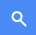
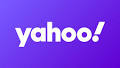
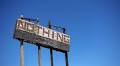
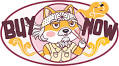

In [56]:
r.text

In [57]:
soup = BeautifulSoup(r.text, 'html.parser')

In [58]:
atags = soup.find_all('a')

In [59]:
atags

[<a href="/?sa=X&amp;ved=0ahUKEwiDh7KRg6X_AhVAOEQIHd-QDIEQOwgC"><span class="V6gwVd">G</span><span class="iWkuvd">o</span><span class="cDrQ7">o</span><span class="V6gwVd">g</span><span class="ntlR9">l</span><span class="iWkuvd tJ3Myc">e</span></a>,
 <a href="/search?q=yahoo+finance+ETH&amp;tbm=nws&amp;ie=UTF-8&amp;gbv=1&amp;sei=PRt6ZMP0M8DwkPIP36GyiAg">here</a>,
 <a class="eZt8xd" href="/search?q=yahoo+finance+ETH&amp;ie=UTF-8&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwiDh7KRg6X_AhVAOEQIHd-QDIEQ_AUIBSgA">All</a>,
 <a class="eZt8xd" href="/search?q=yahoo+finance+ETH&amp;ie=UTF-8&amp;tbm=vid&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwiDh7KRg6X_AhVAOEQIHd-QDIEQ_AUIBygC">Videos</a>,
 <a class="eZt8xd" href="/search?q=yahoo+finance+ETH&amp;ie=UTF-8&amp;tbm=isch&amp;source=lnms&amp;sa=X&amp;ved=0ahUKEwiDh7KRg6X_AhVAOEQIHd-QDIEQ_AUICCgD">Images</a>,
 <a href="https://maps.google.com/maps?q=yahoo+finance+ETH&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwiDh7KRg6X_AhVAOEQIHd-QDIEQ_AUICSgE">Maps</a>,


Loop through all the tickers to get all the URLs

In [ ]:
# raw_urls = {}

# for ticker in monitored_tickers:
#     raw_urls[ticker] = search_for_stocks_news_url(ticker)

The above code can be rewritten as:

In [60]:
raw_urls = {ticker:search_for_stocks_news_url(ticker) for ticker in monitored_tickers}
raw_urls

{'GME': ['/?sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4QOwgC',
  '/search?q=yahoo+finance+GME&tbm=nws&ie=UTF-8&gbv=1&sei=GSR6ZLyCIs_DkPIP_5i2cA',
  '/search?q=yahoo+finance+GME&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUIBSgA',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUIBygC',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICCgD',
  'https://maps.google.com/maps?q=yahoo+finance+GME&um=1&ie=UTF-8&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICSgE',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICigF',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICygG',
  '/advanced_search',
  '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4QpwUIDQ',
  '/search?q=yahoo+finance+GME&ie=UT

In [61]:
# check the keys in the map
raw_urls.keys()

dict_keys(['GME', 'TSLA', 'BTC'])

In [62]:
# check the values in the map
raw_urls.values()

dict_values([['/?sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4QOwgC', '/search?q=yahoo+finance+GME&tbm=nws&ie=UTF-8&gbv=1&sei=GSR6ZLyCIs_DkPIP_5i2cA', '/search?q=yahoo+finance+GME&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUIBSgA', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUIBygC', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICCgD', 'https://maps.google.com/maps?q=yahoo+finance+GME&um=1&ie=UTF-8&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICSgE', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICigF', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICygG', '/advanced_search', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4QpwUIDQ', '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=nws&sou

In [63]:
# check URLs for GME
raw_urls['GME']

['/?sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4QOwgC',
 '/search?q=yahoo+finance+GME&tbm=nws&ie=UTF-8&gbv=1&sei=GSR6ZLyCIs_DkPIP_5i2cA',
 '/search?q=yahoo+finance+GME&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUIBSgA',
 '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUIBygC',
 '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICCgD',
 'https://maps.google.com/maps?q=yahoo+finance+GME&um=1&ie=UTF-8&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICSgE',
 '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=shop&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICigF',
 '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4Q_AUICygG',
 '/advanced_search',
 '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4QpwUIDQ',
 '/search?q=yahoo+finance+GME&ie=UTF-8&tbm=nws&source

In [64]:
# check 1st URL for GME
raw_urls['GME'][0]

'/?sa=X&ved=0ahUKEwj88tvKi6X_AhXPIUQIHX-MDQ4QOwgC'

This above URL is incorrect, so we need to scrap all the bad URLs 

### 4.2 Strip out unwanted URLs

In [65]:
import re

In [66]:
exclude_list = ["map", "policies", "preferences", "accounts", "support"]

In [67]:
def strip_unwanted_urls(urls, exclude_list):
    val = []
    
    for url in urls:
        # find only https:// in url and exclude unwanted words from exclude_list
        if "https://" in url and not any(exclude_word in url for exclude_word in exclude_list):
            # grab only the url containing https. split by & and grab the 1st index so that we get only the url
            res = re.findall(r'(https?://\S+)', url)[0].split('&')[0]
            val.append(res)
    # make sure to remove duplicates
    return list(set(val))

Test the above method

In [68]:
strip_unwanted_urls(raw_urls['GME'], exclude_list)

['https://finance.yahoo.com/news/strength-seen-gamestop-gme-14-144602277.html',
 'https://www.google.com/search?q%3Dyahoo%2Bfinance%2BGME%26tbm%3Dnws%26pccc%3D1',
 'https://finance.yahoo.com/news/byju-lenders-scrap-talks-restructure-063304131.html',
 'https://finance.yahoo.com/news/saudi-flour-milling-company-ipo-093803396.html',
 'https://finance.yahoo.com/news/billionaire-chip-dreams-stymied-india-000225933.html',
 'https://finance.yahoo.com/video/bank-stock-declines-attributed-crowd-205127249.html',
 'https://uk.finance.yahoo.com/news/mexico-extends-gmexico-train-concession-154127289.html',
 'https://finance.yahoo.com/news/gamestop-teams-telos-foundation-grow-155032269.html',
 'https://finance.yahoo.com/news/robinhood-announces-plans-to-launch-24-hour-trading-with-names-like-apple-tesla-130110794.html',
 'https://finance.yahoo.com/news/are-banks-the-new-meme-stocks-193655826.html',
 'https://finance.yahoo.com/news/gamestop-gme-gains-lags-market-221517734.html']

Now, we have cleaned URLs

In [69]:
cleaned_urls = {ticker:strip_unwanted_urls(raw_urls[ticker], exclude_list) for ticker in monitored_tickers}

In [70]:
cleaned_urls

{'GME': ['https://finance.yahoo.com/news/strength-seen-gamestop-gme-14-144602277.html',
  'https://www.google.com/search?q%3Dyahoo%2Bfinance%2BGME%26tbm%3Dnws%26pccc%3D1',
  'https://finance.yahoo.com/news/byju-lenders-scrap-talks-restructure-063304131.html',
  'https://finance.yahoo.com/news/saudi-flour-milling-company-ipo-093803396.html',
  'https://finance.yahoo.com/news/billionaire-chip-dreams-stymied-india-000225933.html',
  'https://finance.yahoo.com/video/bank-stock-declines-attributed-crowd-205127249.html',
  'https://uk.finance.yahoo.com/news/mexico-extends-gmexico-train-concession-154127289.html',
  'https://finance.yahoo.com/news/gamestop-teams-telos-foundation-grow-155032269.html',
  'https://finance.yahoo.com/news/robinhood-announces-plans-to-launch-24-hour-trading-with-names-like-apple-tesla-130110794.html',
  'https://finance.yahoo.com/news/are-banks-the-new-meme-stocks-193655826.html',
  'https://finance.yahoo.com/news/gamestop-gme-gains-lags-market-221517734.html'],
 '

### 4.3 Search and Scrape Cleaned URLs

In [83]:
def scrape_and_grab_text_from_url(URLs):
    """loops through the URLs and grabs the text from the article

    Args:
        URLs (list): list of URLs
    """
    ARTICLES = []
    for url in URLs:
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        paragraphs = soup.find_all('p')
        text = [paragraph.text for paragraph in paragraphs]
        words = ' '.join(text).split(' ')[:350]
        ARTICLE = ' '.join(words)
        ARTICLES.append(ARTICLE)
    
    return ARTICLES

In [84]:
articles = {ticker:scrape_and_grab_text_from_url(cleaned_urls[ticker]) for ticker in monitored_tickers}

In [85]:
articles

{'GME': ['Thank you for your patience. Our engineers are working quickly to resolve the issue.',
  '© 2023 - Privacy - Terms',
  '(Bloomberg) -- Creditors to Byju’s, India’s most valuable startup, have pulled out of negotiations with the company to recast a $1.2 billion loan, posing a new setback to the beleaguered tech firm, according to people familiar with the matter. Most Read from Bloomberg China Is Drilling a 10,000-Meter-Deep Hole Into the Earth Amazon Is in Talks to Offer Free Mobile Service to US Prime Members Inside the Making of Redfall, Xbox’s Latest Misfire Rich Latin Americans Transform Laid-Back Madrid Into a New Miami Hedge Funds at War for Top Traders Dangle $120 Million Payouts The talks were called off after the creditors moved court, and accused the firm of hiding $500 million of funds raised, the people said, asking not to be named as the information is not public. Lenders can now sell the term loan B securities of the firm as the restraint that came as part of the

In [86]:
articles['GME']

['Thank you for your patience. Our engineers are working quickly to resolve the issue.',
 '© 2023 - Privacy - Terms',
 '(Bloomberg) -- Creditors to Byju’s, India’s most valuable startup, have pulled out of negotiations with the company to recast a $1.2 billion loan, posing a new setback to the beleaguered tech firm, according to people familiar with the matter. Most Read from Bloomberg China Is Drilling a 10,000-Meter-Deep Hole Into the Earth Amazon Is in Talks to Offer Free Mobile Service to US Prime Members Inside the Making of Redfall, Xbox’s Latest Misfire Rich Latin Americans Transform Laid-Back Madrid Into a New Miami Hedge Funds at War for Top Traders Dangle $120 Million Payouts The talks were called off after the creditors moved court, and accused the firm of hiding $500 million of funds raised, the people said, asking not to be named as the information is not public. Lenders can now sell the term loan B securities of the firm as the restraint that came as part of the negotiati

In [87]:
# grab 1st article for GME
articles['GME'][0]

'Thank you for your patience. Our engineers are working quickly to resolve the issue.'

### 4.4 Summarize all Articles

In [88]:
def summarize_articles(articles):
    """summarize articles
    
    Args:
        articles (list): list of articles
    
    Returns:
        list: list of summaries
    """
    summaries = []
    for article in articles:
        input_ids = tokenizer.encode(article, return_tensors='pt')
        output = model.generate(input_ids, max_length=55, num_beams=5, early_stopping=True)
        summary = tokenizer.decode(output[0], skip_special_tokens=True)
        summaries.append(summary)
    return summaries

In [89]:
summaries = {ticker:summarize_articles(articles[ticker]) for ticker in monitored_tickers}

In [90]:
summaries

{'GME': ['We are aware of the issue and are working to resolve it.',
  'All images are copyrighted.',
  'Lenders accused firm of hiding $500 million of funds. Firm has to make interest payment on $1.2 billion loan by June 5',
  'First Milling’s IPO is set to be second biggest in 2020',
  'Vedanta-Hon Hai venture hasn’t found production-ready technology. Billionaire’s plan to establish India’s first major chipmaking operation',
  'We are aware of the issue and are working to resolve it.',
  'We are aware of the issue and are working to resolve it.',
  'Retailer to launch Web3 game launchpad Playr. Deal comes as retailer moves away from brick and mortar',
  'Trading platform to allow users to trade 24 hours a day. Platform also saw monthly active users rise in the first quarter',
  'Retail investors are piling into put options to short banks. ‘It’s a sentiment trade right now,’ CFRA’s Yokum says',
  'Video game retailer had gained 27.25% over the past month. Heading into today, shares of

In [91]:
summaries["GME"]

['We are aware of the issue and are working to resolve it.',
 'All images are copyrighted.',
 'Lenders accused firm of hiding $500 million of funds. Firm has to make interest payment on $1.2 billion loan by June 5',
 'First Milling’s IPO is set to be second biggest in 2020',
 'Vedanta-Hon Hai venture hasn’t found production-ready technology. Billionaire’s plan to establish India’s first major chipmaking operation',
 'We are aware of the issue and are working to resolve it.',
 'We are aware of the issue and are working to resolve it.',
 'Retailer to launch Web3 game launchpad Playr. Deal comes as retailer moves away from brick and mortar',
 'Trading platform to allow users to trade 24 hours a day. Platform also saw monthly active users rise in the first quarter',
 'Retail investors are piling into put options to short banks. ‘It’s a sentiment trade right now,’ CFRA’s Yokum says',
 'Video game retailer had gained 27.25% over the past month. Heading into today, shares of the video game re

In [92]:
summaries["TSLA"]

['We are aware of the issue and are working to resolve it.',
 'Shares of Tesla have outperformed the Automotive - Domestic industry over the past year. TotalEnergies has outperformed the Oil and Gas - Refining and Marketing industry',
 'Billionaire described U.S. and China like conjoined twins. Musk is in China this week to speak with officials',
 'All images are copyrighted.',
 'We are aware of the issue and are working to resolve it.',
 'Electric-vehicle maker’s shares have been under pressure since earnings. Tesla jacked up prices of its most expensive cars in China',
 'Deal allows Ford to access more than 12,000 Tesla superchargers in North America. Auto parts retailer AutoZone reports mixed third-quarter results',
 'Tesla offers steeper discounts of $6,330, $5,000 on higher-priced vehicles.',
 'Tesla’s new truck to be more than a ‘niche product,’ firm says. ARK sees EV market share hitting over 70% by 2027',
 'EV maker has delivered positive earnings surprises in nine quarters. Mu

### 5. Adding Sentiment Analysis to the summaries

In [94]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [95]:
sentiment_pipeline(summaries["GME"])

[{'label': 'POSITIVE', 'score': 0.9979088306427002},
 {'label': 'NEGATIVE', 'score': 0.9880996346473694},
 {'label': 'NEGATIVE', 'score': 0.9937775135040283},
 {'label': 'POSITIVE', 'score': 0.9689701199531555},
 {'label': 'NEGATIVE', 'score': 0.9980353713035583},
 {'label': 'POSITIVE', 'score': 0.9979088306427002},
 {'label': 'POSITIVE', 'score': 0.9979088306427002},
 {'label': 'NEGATIVE', 'score': 0.9740396738052368},
 {'label': 'POSITIVE', 'score': 0.9726309180259705},
 {'label': 'NEGATIVE', 'score': 0.960085928440094},
 {'label': 'NEGATIVE', 'score': 0.9038848280906677}]

In [96]:
scores = {ticker:sentiment_pipeline(summaries[ticker]) for ticker in monitored_tickers}

In [97]:
scores

{'GME': [{'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.9880996346473694},
  {'label': 'NEGATIVE', 'score': 0.9937775135040283},
  {'label': 'POSITIVE', 'score': 0.9689701199531555},
  {'label': 'NEGATIVE', 'score': 0.9980353713035583},
  {'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.9740396738052368},
  {'label': 'POSITIVE', 'score': 0.9726309180259705},
  {'label': 'NEGATIVE', 'score': 0.960085928440094},
  {'label': 'NEGATIVE', 'score': 0.9038848280906677}],
 'TSLA': [{'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.8901519775390625},
  {'label': 'POSITIVE', 'score': 0.9782180190086365},
  {'label': 'NEGATIVE', 'score': 0.9880996346473694},
  {'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.9885679483413696},
  {'label': 'NEGATIVE', 'score': 0.9910306930541992},
  {'label': '

In [103]:
print(summaries["GME"][2], scores["GME"][2]['label'], scores["GME"][2]['score'])

Lenders accused firm of hiding $500 million of funds. Firm has to make interest payment on $1.2 billion loan by June 5 NEGATIVE 0.9937775135040283


In [106]:
summaries["GME"][2]

'Lenders accused firm of hiding $500 million of funds. Firm has to make interest payment on $1.2 billion loan by June 5'

In [107]:
scores["GME"][2]['label']

'NEGATIVE'

In [108]:
scores["GME"][2]['score']

0.9937775135040283

# 6. Exporting Results to CSV

In [109]:
summaries

{'GME': ['We are aware of the issue and are working to resolve it.',
  'All images are copyrighted.',
  'Lenders accused firm of hiding $500 million of funds. Firm has to make interest payment on $1.2 billion loan by June 5',
  'First Milling’s IPO is set to be second biggest in 2020',
  'Vedanta-Hon Hai venture hasn’t found production-ready technology. Billionaire’s plan to establish India’s first major chipmaking operation',
  'We are aware of the issue and are working to resolve it.',
  'We are aware of the issue and are working to resolve it.',
  'Retailer to launch Web3 game launchpad Playr. Deal comes as retailer moves away from brick and mortar',
  'Trading platform to allow users to trade 24 hours a day. Platform also saw monthly active users rise in the first quarter',
  'Retail investors are piling into put options to short banks. ‘It’s a sentiment trade right now,’ CFRA’s Yokum says',
  'Video game retailer had gained 27.25% over the past month. Heading into today, shares of

In [110]:
scores

{'GME': [{'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.9880996346473694},
  {'label': 'NEGATIVE', 'score': 0.9937775135040283},
  {'label': 'POSITIVE', 'score': 0.9689701199531555},
  {'label': 'NEGATIVE', 'score': 0.9980353713035583},
  {'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.9740396738052368},
  {'label': 'POSITIVE', 'score': 0.9726309180259705},
  {'label': 'NEGATIVE', 'score': 0.960085928440094},
  {'label': 'NEGATIVE', 'score': 0.9038848280906677}],
 'TSLA': [{'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.8901519775390625},
  {'label': 'POSITIVE', 'score': 0.9782180190086365},
  {'label': 'NEGATIVE', 'score': 0.9880996346473694},
  {'label': 'POSITIVE', 'score': 0.9979088306427002},
  {'label': 'NEGATIVE', 'score': 0.9885679483413696},
  {'label': 'NEGATIVE', 'score': 0.9910306930541992},
  {'label': '

In [111]:
cleaned_urls

{'GME': ['https://finance.yahoo.com/news/strength-seen-gamestop-gme-14-144602277.html',
  'https://www.google.com/search?q%3Dyahoo%2Bfinance%2BGME%26tbm%3Dnws%26pccc%3D1',
  'https://finance.yahoo.com/news/byju-lenders-scrap-talks-restructure-063304131.html',
  'https://finance.yahoo.com/news/saudi-flour-milling-company-ipo-093803396.html',
  'https://finance.yahoo.com/news/billionaire-chip-dreams-stymied-india-000225933.html',
  'https://finance.yahoo.com/video/bank-stock-declines-attributed-crowd-205127249.html',
  'https://uk.finance.yahoo.com/news/mexico-extends-gmexico-train-concession-154127289.html',
  'https://finance.yahoo.com/news/gamestop-teams-telos-foundation-grow-155032269.html',
  'https://finance.yahoo.com/news/robinhood-announces-plans-to-launch-24-hour-trading-with-names-like-apple-tesla-130110794.html',
  'https://finance.yahoo.com/news/are-banks-the-new-meme-stocks-193655826.html',
  'https://finance.yahoo.com/news/gamestop-gme-gains-lags-market-221517734.html'],
 '

In [117]:
def create_output_array(summaries, scores, cleaned_urls):
    """create output array
    
    Args:
        summaries (list): list of summaries
        scores (list): list of scores
        cleaned_urls (list): list of cleaned urls
    
    Returns:
        list: list of dictionaries
    """
    output = []
    # loop through the tickers
    for ticker in monitored_tickers:
        # loop through the summaries
        for counter in range(len(summaries[ticker])):
            output_this = [
                ticker,
                summaries[ticker][counter],
                scores[ticker][counter]['label'],
                scores[ticker][counter]['score'],
                cleaned_urls[ticker][counter]
            ]
            output.append(output_this)
    return output

breakdown of above code

In [112]:
summaries["GME"]

['We are aware of the issue and are working to resolve it.',
 'All images are copyrighted.',
 'Lenders accused firm of hiding $500 million of funds. Firm has to make interest payment on $1.2 billion loan by June 5',
 'First Milling’s IPO is set to be second biggest in 2020',
 'Vedanta-Hon Hai venture hasn’t found production-ready technology. Billionaire’s plan to establish India’s first major chipmaking operation',
 'We are aware of the issue and are working to resolve it.',
 'We are aware of the issue and are working to resolve it.',
 'Retailer to launch Web3 game launchpad Playr. Deal comes as retailer moves away from brick and mortar',
 'Trading platform to allow users to trade 24 hours a day. Platform also saw monthly active users rise in the first quarter',
 'Retail investors are piling into put options to short banks. ‘It’s a sentiment trade right now,’ CFRA’s Yokum says',
 'Video game retailer had gained 27.25% over the past month. Heading into today, shares of the video game re

In [113]:
len(summaries["GME"])

11

In [114]:
range(len(summaries["GME"]))

range(0, 11)

In [115]:
# grab the 1st summary for GME
summaries["GME"][0]

'We are aware of the issue and are working to resolve it.'

Create the final output array

In [118]:
final_output = create_output_array(summaries, scores, cleaned_urls)

In [119]:
final_output

[['GME',
  'We are aware of the issue and are working to resolve it.',
  'POSITIVE',
  0.9979088306427002,
  'https://finance.yahoo.com/news/strength-seen-gamestop-gme-14-144602277.html'],
 ['GME',
  'All images are copyrighted.',
  'NEGATIVE',
  0.9880996346473694,
  'https://www.google.com/search?q%3Dyahoo%2Bfinance%2BGME%26tbm%3Dnws%26pccc%3D1'],
 ['GME',
  'Lenders accused firm of hiding $500 million of funds. Firm has to make interest payment on $1.2 billion loan by June 5',
  'NEGATIVE',
  0.9937775135040283,
  'https://finance.yahoo.com/news/byju-lenders-scrap-talks-restructure-063304131.html'],
 ['GME',
  'First Milling’s IPO is set to be second biggest in 2020',
  'POSITIVE',
  0.9689701199531555,
  'https://finance.yahoo.com/news/saudi-flour-milling-company-ipo-093803396.html'],
 ['GME',
  'Vedanta-Hon Hai venture hasn’t found production-ready technology. Billionaire’s plan to establish India’s first major chipmaking operation',
  'NEGATIVE',
  0.9980353713035583,
  'https://

Add column names to each column in the final output

In [120]:
final_output.insert(0, ["Ticker", "Summary", "Sentiment", "Confidence", "URL"])

In [121]:
final_output

[['Ticker', 'Summary', 'Sentiment', 'Confidence', 'URL'],
 ['GME',
  'We are aware of the issue and are working to resolve it.',
  'POSITIVE',
  0.9979088306427002,
  'https://finance.yahoo.com/news/strength-seen-gamestop-gme-14-144602277.html'],
 ['GME',
  'All images are copyrighted.',
  'NEGATIVE',
  0.9880996346473694,
  'https://www.google.com/search?q%3Dyahoo%2Bfinance%2BGME%26tbm%3Dnws%26pccc%3D1'],
 ['GME',
  'Lenders accused firm of hiding $500 million of funds. Firm has to make interest payment on $1.2 billion loan by June 5',
  'NEGATIVE',
  0.9937775135040283,
  'https://finance.yahoo.com/news/byju-lenders-scrap-talks-restructure-063304131.html'],
 ['GME',
  'First Milling’s IPO is set to be second biggest in 2020',
  'POSITIVE',
  0.9689701199531555,
  'https://finance.yahoo.com/news/saudi-flour-milling-company-ipo-093803396.html'],
 ['GME',
  'Vedanta-Hon Hai venture hasn’t found production-ready technology. Billionaire’s plan to establish India’s first major chipmaking o

Output to CSV

In [123]:
with open("./output/asset_summaries.csv", mode = "w", newline = "") as f:
    writer = csv.writer(f, delimiter = ",", quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    writer.writerows(final_output)